JackyTranQ4 Pollutant Emission

In [70]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from matplotlib.pyplot import title
from matplotlib.pyplot import subplot

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

year_list = ['2020/2021', '2019/2020', '2018/2019', '2017/2018', '2016/2017',
'2015/2016', '2014/2015', '2013/2014', '2012/2013', '2011/2012', '2010/2011',
'2009/2010', '2008/2009', '2007/2008', '2006/2007', '2005/2006', '2004/2005',
'2003/2004', '2002/2003', '2001/2002', '2000/2001', '1999/2000', '1998/1999']

def load_file(year_to_load = "all"):
    if year_to_load == "all":
        load_this = "emissions.csv"
        if os.path.isfile(load_this):
            print(f"loading from file: {load_this}")
            return_dataset = pd.read_csv(load_this)
        else:
            print("Can't find dataset")
    else:
        from_year, to_year = year_to_load.split("/")
        load_this = f"emissions {from_year} to {to_year}.xlsx"
        if os.path.isfile(load_this):
            print(f"loading from file: {load_this}")
            return_dataset = pd.read_excel(load_this)
        else:
            print("Can't find dataset")
    return_rows_of_data = len(return_dataset.index)
    return return_dataset, return_rows_of_data

def unique_items_into_list(data, heading):
    return_list = []
    for item in data[heading]:
        if item not in return_list:
            return_list.append(item)
    return return_list

def total_emission(data_of_row):
    total = 0
    if not pd.isna(data_of_row["air_total_emission_kg"]):
        total += data_of_row["air_total_emission_kg"]
    if not pd.isna(data_of_row["water_emission_kg"]):
        total += data_of_row["water_emission_kg"]
    if not pd.isna(data_of_row["land_emission_kg"]):
        total += data_of_row["land_emission_kg"]
    #print(total)
    return total

def filter_function(word, list_keywords):
    if word in list_keywords:
        return True
    else:
        return False

def get_substance_info(year):
    list_emission_amount = []
    dict_amount_of_emission = {}
    emissions_data, rows_of_data = load_file(year)

def filter_function(word, list_keywords):
    if word in list_keywords:
        return True
    else:
        return False

def get_substance_info(year):
    list_emission_amount = []
    dict_amount_of_emission = {}
    emissions_data, rows_of_data = load_file(year)

    for substance in list_substance_name:
        if filter_function(substance, list_keywords):
            dict_amount_of_emission[substance] = []

    for row in range(0, rows_of_data):
        data_of_row = emissions_data.iloc[row]
        if filter_function(data_of_row["substance_name"], list_keywords):
            append_total_emission = total_emission(data_of_row)
            dict_amount_of_emission[data_of_row["substance_name"]].append(append_total_emission)

    for substance in dict_amount_of_emission:
        dict_amount_of_emission[substance] = sum(dict_amount_of_emission[substance])
        list_emission_amount.append(dict_amount_of_emission[substance])
    return list_emission_amount

    
emissions_data, rows_of_data = load_file()

loading from file: emissions.csv


In [71]:
for x in emissions_data:
    print(x)

report_id
report_year
facility_id
jurisdiction_code
jurisdiction_facility_id
facility_name
registered_business_name
primary_anzsic_class_code
primary_anzsic_class_name
substance_id
substance_sort_order
substance_name
air_point_emission_kg
air_point_eet
air_fugitive_emission_kg
air_fugitive_eet
air_total_emission_kg
water_emission_kg
water_eet
land_emission_kg
land_eet
suburb
state
postcode
latitude
longitude
pivot_facility_name


loading from file: emissions.csv
Rows of data: 830263


<AxesSubplot:>

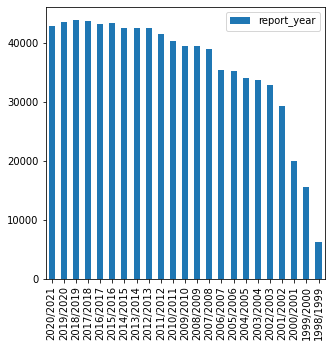

In [72]:
emissions_data, rows_of_data = load_file()

list_years = []

list_years = unique_items_into_list(emissions_data, "report_year")
print(f"Rows of data: {rows_of_data}")

df_year_tally = emissions_data['report_year'].value_counts(sort=False)
df_year_tally = pd.DataFrame(df_year_tally)

df_year_tally.plot(kind = "bar", figsize = (5,5))

Types of emissions

In [74]:
#Different types of emissions
emissions_data, rows_of_data = load_file("2020/2021")
emissions_data.columns
row_one = emissions_data.iloc[0]

list_substance_name = []
list_substance_name = unique_items_into_list(emissions_data, "substance_name")
#print(list_substance_name)

print(f"Number of different types of substances in year: {len(list_substance_name)}")

loading from file: emissions 2020 to 2021.xlsx
Number of different types of substances in year: 83


Frequency Of Emission

loading from file: emissions 2020 to 2021.xlsx
                                            substance_name
Total Volatile Organic Compounds                      3302
Carbon monoxide                                       2077
Sulfur dioxide                                        2055
Oxides of Nitrogen                                    2053
Particulate Matter ≤10.0 µm (PM10)                    2053
Particulate Matter ≤2.5 µm (PM2.5)                    2036
Polycyclic aromatic hydrocarbons (B[a]Peq)            1987
Mercury & compounds                                   1455
Chromium (III) compounds                              1362
Lead & compounds                                      1349
Copper & compounds                                    1331
Nickel & compounds                                    1323
Arsenic & compounds                                   1193
Cadmium & compounds                                   1140
Xylenes (individual or mixed isomers)                 1022
Beryllium

Text(0, 0.5, 'Substance')

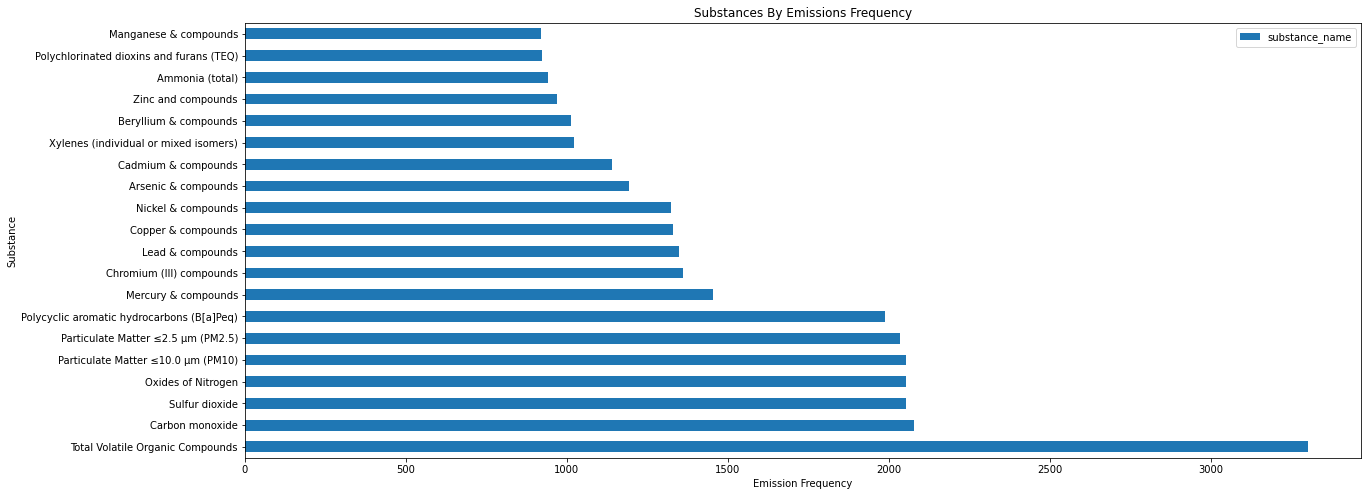

In [75]:
emissions_data, rows_of_data = load_file("2020/2021")
substance_tally = emissions_data['substance_name'].value_counts(sort=True)
df_substance_tally = pd.DataFrame(substance_tally)
print(df_substance_tally)
top_df_substance_tally = df_substance_tally.nlargest(20, "substance_name")

top_df_substance_tally.plot(kind = "barh", figsize = (20,8))
plt.title("Substances By Emissions Frequency")
plt.xlabel("Emission Frequency")
plt.ylabel("Substance")

Amount Of Emission

loading from file: emissions 2020 to 2021.xlsx
Chromium (VI) compounds 4.396e-17 523696
                             Substance      Emission Amount
6   Particulate Matter ≤10.0 µm (PM10)     1,223,925,027.29
8                       Sulfur dioxide       973,088,155.39
3                      Carbon monoxide       744,673,023.69
4                   Oxides of Nitrogen       714,243,986.35
1     Total Volatile Organic Compounds        99,622,343.68
2                      Ammonia (total)        76,382,701.26
60                      Total Nitrogen        38,772,891.12
5   Particulate Matter ≤2.5 µm (PM2.5)        28,538,977.70
33                   Hydrochloric acid        27,145,025.62
53                  Fluoride compounds         8,836,896.81


Text(0, 0.5, 'Substance')

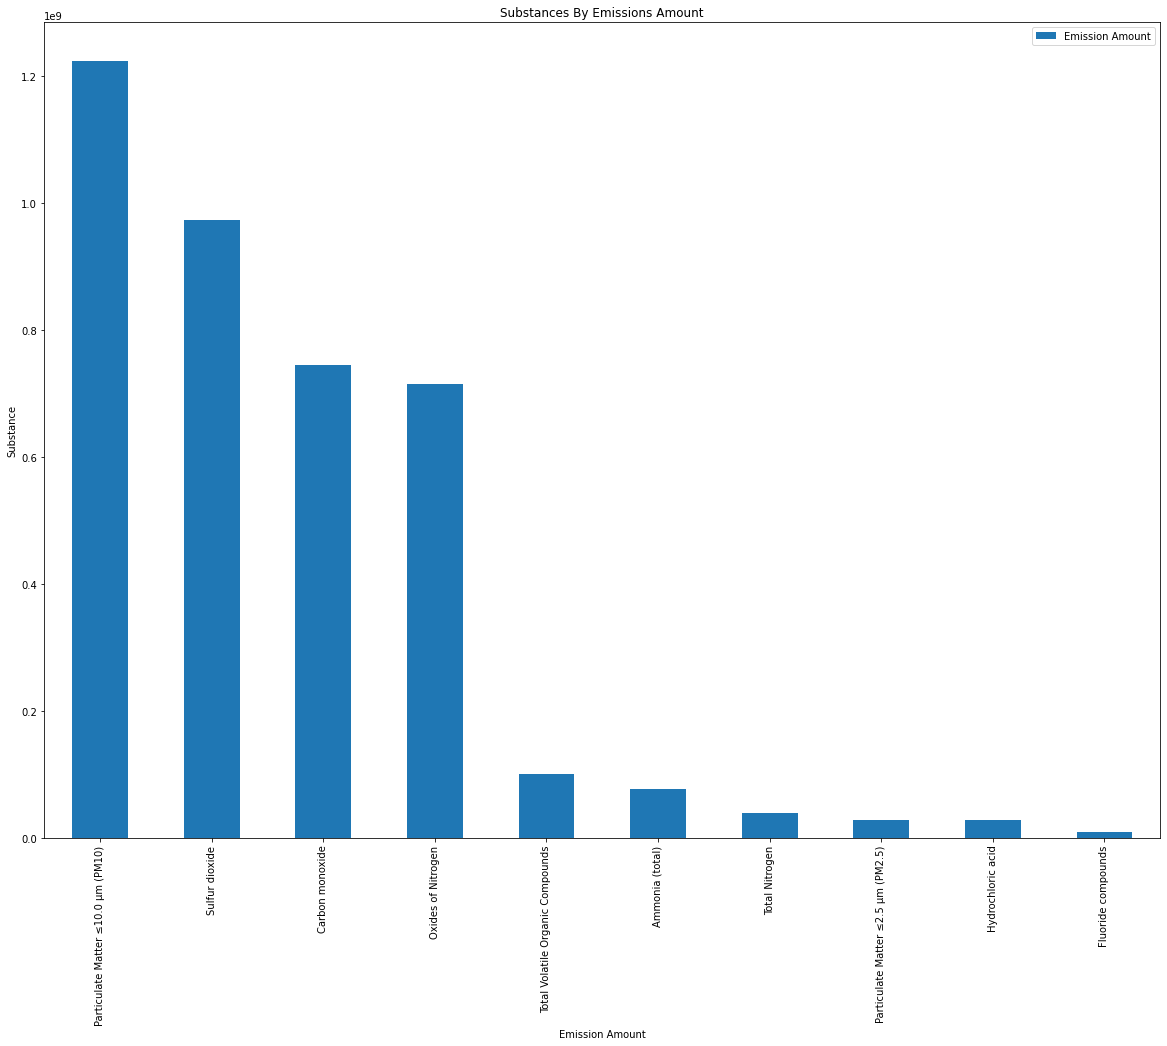

In [76]:
small = 1
list_emission_amount = []
dict_amount_of_emission = {}
df_substances_by_emission_amount = {}

emissions_data, rows_of_data = load_file("2020/2021")

for substance in list_substance_name:
    dict_amount_of_emission[substance] = []
#print(dict_amount_of_emission)

for row in range(0, rows_of_data):
    data_of_row = emissions_data.iloc[row]
    append_total_emission = total_emission(data_of_row)
    dict_amount_of_emission[data_of_row["substance_name"]].append(append_total_emission)
    
#Finding smallest recorded substance
    if append_total_emission < small:
        small = append_total_emission
        source = data_of_row["substance_name"]
        report = data_of_row["report_id"]
print(source, small, report)


for substance in dict_amount_of_emission:
    dict_amount_of_emission[substance] = sum(dict_amount_of_emission[substance])
    list_emission_amount.append(dict_amount_of_emission[substance])

#print(dict_amount_of_emission)
df_substances_by_emission_amount["Substance"] = list_substance_name
df_substances_by_emission_amount["Emission Amount"] = list_emission_amount

pd.options.display.float_format = '{:20,.2f}'.format

df_substances_by_emission_amount=pd.DataFrame(df_substances_by_emission_amount)
df_sort = df_substances_by_emission_amount.sort_values(by="Emission Amount", ascending=False)
top_df_sort = df_sort.nlargest(10, "Emission Amount")
print(top_df_sort)

top_df_sort.plot(x ="Substance", y="Emission Amount", kind = "bar", figsize=(20,15))
plt.title("Substances By Emissions Amount")
plt.xlabel("Emission Amount")
plt.ylabel("Substance")

loading from file: emissions 2020 to 2021.xlsx
loading from file: emissions 2015 to 2016.xlsx
loading from file: emissions 2010 to 2011.xlsx
loading from file: emissions 2005 to 2006.xlsx


Text(0, 0.5, 'Emission Amount')

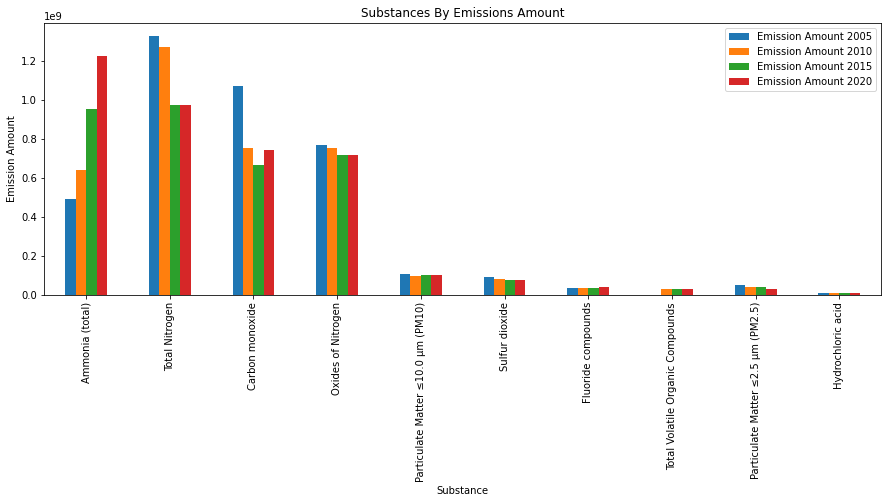

In [77]:


list_keywords = ["Particulate Matter ≤10.0 µm (PM10)", "Sulfur dioxide", "Carbon monoxide", "Oxides of Nitrogen",
"Total Volatile Organic Compounds", "Ammonia (total)", "Total Nitrogen", "Particulate Matter ≤2.5 µm (PM2.5)", "Hydrochloric acid", 
"Fluoride compounds"]

df_substances_by_emission_amount_2020 = get_substance_info("2020/2021")
df_substances_by_emission_amount_2015 = get_substance_info("2015/2016")
df_substances_by_emission_amount_2010 = get_substance_info("2010/2011")
df_substances_by_emission_amount_2005 = get_substance_info("2005/2006")

df_substances_by_emission_amount=pd.DataFrame({
    "Emission Amount 2005":df_substances_by_emission_amount_2005,
    "Emission Amount 2010":df_substances_by_emission_amount_2010,
    "Emission Amount 2015":df_substances_by_emission_amount_2015,
    "Emission Amount 2020":df_substances_by_emission_amount_2020,
    }, 
    index=list_keywords
)

pd.options.display.float_format = '{:20,.2f}'.format

df_sort = df_substances_by_emission_amount.sort_values(by="Emission Amount 2020", ascending=False)

df_sort.plot(kind = "bar", figsize=(15,5))
plt.title("Substances By Emissions Amount")
plt.xlabel("Substance")
plt.ylabel("Emission Amount")

Ammonia is used widely in many areas. It is present in commonly used household and industrial cleaners, bleaching agents and disinfectants. It is used in the preparation of synthetic fibres (e.g. nylons), plastics and explosives, resins, human and veterinary medicines, fertilisers, chemical compounds, fuel cells, rocket fuel, dyes, metal treating operations, refrigeration, and in the petroleum industry. -From National Pollutant Index

Smallest recorded: Chromium (VI) compounds 0.00000000000000004396kg or 0.00000000000004396g

Least used substance: Polychlorinated dioxins and furans (TEQ) 0.04kg in 2021

3989301398.1130447 kg in 2020
3249103564.1551433 kg in 2000

Industries That Produce Emissions

In [78]:
emissions_data, rows_of_data = load_file("2020/2021")
list_industry = unique_items_into_list(emissions_data, "primary_anzsic_class_name")
print(f"Different types of industries in year: {len(list_industry)}")
for industry in list_industry:
    print(industry)

loading from file: emissions 2020 to 2021.xlsx
Different types of industries in year: 144
Wine and Other Alcoholic Beverage Manufacturing
Beer Manufacturing
Beef Cattle Feedlots (Specialised)
Waste Treatment and Disposal Services
Meat Processing
Pig Farming
Other Petroleum and Coal Product Manufacturing
Port and Water Transport Terminal Operations
Milk and Cream Processing
Gold Ore Mining
Coal Mining
Basic Inorganic Chemical Manufacturing
Cement and Lime Manufacturing
Other Non-Metallic Mineral Mining and Quarrying
Other Construction Material Mining
Metal Coating and Finishing
Water Supply
Polymer Foam Product Manufacturing
Gas Supply
Oil and Gas Extraction
Fossil Fuel Electricity Generation
Petroleum Refining and Petroleum Fuel Manufacturing
Fertiliser Manufacturing
Industrial Gas Manufacturing
Other Professional and Scientific Equipment Manufacturing
Natural Rubber Product Manufacturing
Log Sawmilling
Paint and Coatings Manufacturing
Basic Organic Chemical Manufacturing
Sewerage and 

Gas Supply\
Oil and Gas Extraction\
Fossil Fuel Electricity Generation\
Petroleum Refining and Petroleum Fuel Manufacturing\
Industrial Gas Manufacturing\
Petroleum Product Wholesaling\ 

Biscuit Manufacturing (Factory based)\
Bread Manufacturing (Factory based)

loading from file: emissions 2020 to 2021.xlsx
                                             Industry      Emission Amount
20                 Fossil Fuel Electricity Generation       831,812,456.91
10                                        Coal Mining       463,264,451.86
50                                    Iron Ore Mining       458,161,202.78
90  Copper, Silver, Lead and Zinc Smelting and Ref...       422,813,976.28
35              Iron Smelting and Steel Manufacturing       258,269,525.73
9                                     Gold Ore Mining       229,929,937.40
19                             Oil and Gas Extraction       207,314,100.96
32                                 Aluminium Smelting       178,605,849.70
13    Other Non-Metallic Mineral Mining and Quarrying       168,261,206.00
29                     Sewerage and Drainage Services        68,670,426.28
31                                 Alumina Production        62,819,031.28
64                                  Nickel Ore Mining

Text(0, 0.5, 'Emission Amount')

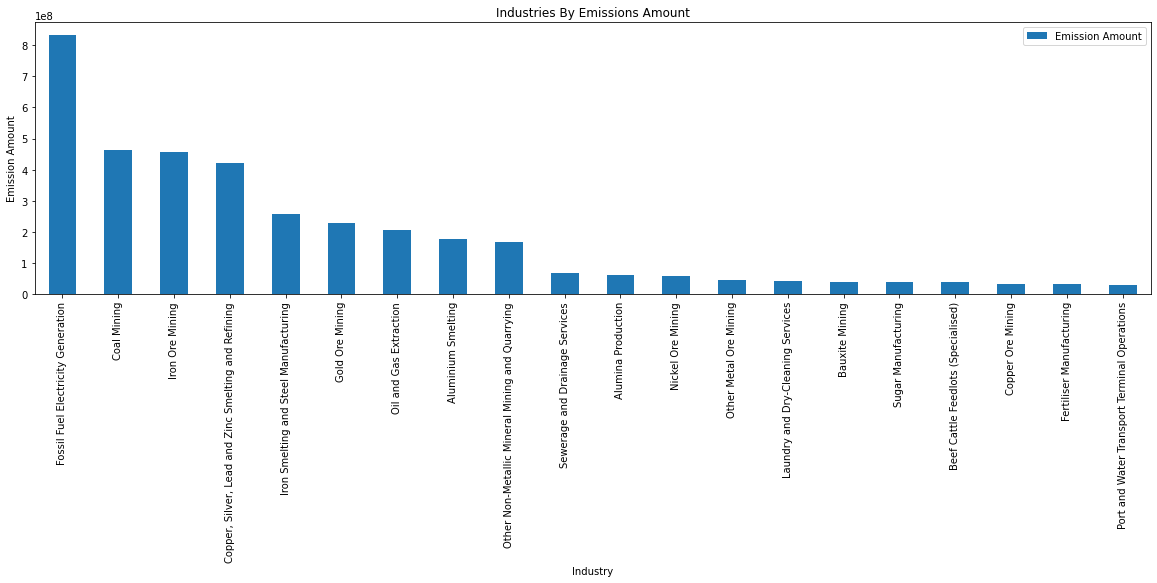

In [79]:
list_emission_amount = []
dict_amount_of_emission_by_industry = {}
df_industries_by_emission_amount = {}

emissions_data, rows_of_data = load_file("2020/2021")

list_industry = unique_items_into_list(emissions_data, "primary_anzsic_class_name")
for industry in list_industry:
    dict_amount_of_emission_by_industry[industry] = []
#print(dict_amount_of_emission_by_industry)

for row in range(0, rows_of_data):
    data_of_row = emissions_data.iloc[row]
    append_total_emission = total_emission(data_of_row)
    dict_amount_of_emission_by_industry[data_of_row["primary_anzsic_class_name"]].append(append_total_emission)

for industry in dict_amount_of_emission_by_industry:
    dict_amount_of_emission_by_industry[industry] = sum(dict_amount_of_emission_by_industry[industry])
    list_emission_amount.append(dict_amount_of_emission_by_industry[industry])

#print(dict_amount_of_emission_by_industry)
df_industries_by_emission_amount["Industry"] = list_industry
df_industries_by_emission_amount["Emission Amount"] = list_emission_amount

pd.options.display.float_format = '{:20,.2f}'.format

df_industries_by_emission_amount=pd.DataFrame(df_industries_by_emission_amount)
df_sort = df_industries_by_emission_amount.sort_values(by="Emission Amount", ascending=False)
top_df_sort = df_sort.nlargest(20, "Emission Amount")

print(top_df_sort)

top_df_sort.plot(x ="Industry", y="Emission Amount", kind = "bar", figsize=(20,5))
plt.title("Industries By Emissions Amount")
plt.xlabel("Industry")
plt.ylabel("Emission Amount")

Average Per Business

loading from file: emissions 2020 to 2021.xlsx
                                             Industry      Emission Amount
90  Copper, Silver, Lead and Zinc Smelting and Ref...        42,281,397.63
32                                 Aluminium Smelting        35,721,169.94
35              Iron Smelting and Steel Manufacturing        32,283,690.72
50                                    Iron Ore Mining        20,825,509.22
31                                 Alumina Production        15,704,757.82
20                 Fossil Fuel Electricity Generation        10,021,836.83
30                                     Bauxite Mining         7,955,286.24
19                             Oil and Gas Extraction         6,478,565.66
39                  Laundry and Dry-Cleaning Services         6,155,091.39
10                                        Coal Mining         5,649,566.49


Text(0, 0.5, 'Emission Amount Per Business')

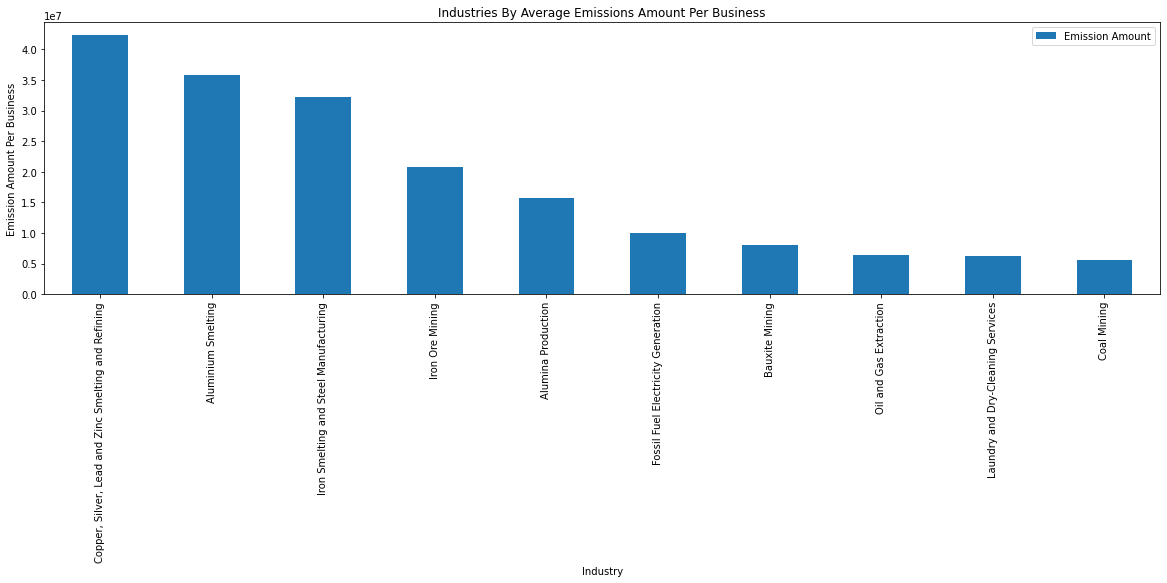

In [80]:
df_industries_by_emission_amount_average = {}

emissions_data, rows_of_data = load_file("2020/2021")
list_emission_amount = []
list_business = []
dict_amount_of_emission_by_industry = {}
dict_industries_by_business_amount = {}
dict_amount_of_emission_by_industry_average = {}
dict_industries_by_different_substances = {}

list_industry = unique_items_into_list(emissions_data, "primary_anzsic_class_name")
for industry in list_industry:
    dict_amount_of_emission_by_industry[industry] = []
    dict_industries_by_business_amount[industry] = []
    dict_industries_by_different_substances[industry] = []

for row in range(0, rows_of_data):
    data_of_row = emissions_data.iloc[row]
    append_total_emission = total_emission(data_of_row)
    dict_amount_of_emission_by_industry[data_of_row["primary_anzsic_class_name"]].append(append_total_emission)
    if data_of_row["registered_business_name"] not in dict_industries_by_business_amount[data_of_row["primary_anzsic_class_name"]]:
        dict_industries_by_business_amount[data_of_row["primary_anzsic_class_name"]].append(data_of_row["registered_business_name"])
    
    #if data_of_row["substance_name"] not in dict_industries_by_different_substances[data_of_row["primary_anzsic_class_name"]]:
        #if data_of_row["primary_anzsic_class_name"] == "Dairy Cattle Farming":
            #print(data_of_row["report_id"])
        #dict_industries_by_different_substances[data_of_row["primary_anzsic_class_name"]].append(data_of_row["substance_name"])

"""for x in dict_industries_by_different_substances:
    print(f"{x} {len(dict_industries_by_different_substances[x])}")"""

#print(dict_industries_by_different_substances["Dairy Cattle Farming"])

#print(dict_industries_by_different_substances)

list_industry = []

for industry in dict_amount_of_emission_by_industry:
    dict_industries_by_business_amount[industry] = len(dict_industries_by_business_amount[industry])
    dict_amount_of_emission_by_industry_average[industry] = sum(dict_amount_of_emission_by_industry[industry])/dict_industries_by_business_amount[industry]
    list_industry.append(industry)
    list_emission_amount.append(dict_amount_of_emission_by_industry_average[industry])

df_industries_by_emission_amount_average["Industry"] = list_industry
df_industries_by_emission_amount_average["Emission Amount"] = list_emission_amount

pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_rows', 200)

df_industries_by_emission_amount_average=pd.DataFrame(df_industries_by_emission_amount_average)
df_sort = df_industries_by_emission_amount_average.sort_values(by="Emission Amount", ascending=False)
top_df_sort = df_sort.nlargest(10, "Emission Amount")

print(top_df_sort)

top_df_sort = df_sort.nlargest(10, "Emission Amount")
top_df_sort.plot(x ="Industry", y="Emission Amount", kind = "bar", figsize=(20,5))
plt.title("Industries By Average Emissions Amount Per Business")
plt.xlabel("Industry")
plt.ylabel("Emission Amount Per Business")

Map

In [81]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

def map1():
    list_latitude = []
    list_longitude = []
    list_business = []
    emissions_data, rows_of_data = load_file("2020/2021")

    for row in range(0, rows_of_data):
        data_of_row = emissions_data.iloc[row]
        if data_of_row["registered_business_name"] not in list_business:
            list_latitude.append(data_of_row["latitude"])
            list_longitude.append(data_of_row["longitude"])
            list_business.append(data_of_row["registered_business_name"])

    df = pd.DataFrame(
        {'Business': list_business,
         'Latitude': list_latitude,
         'Longitude': list_longitude})

    gdf = geopandas.GeoDataFrame(
        df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

    ax = world[world.continent == 'Oceania'].plot(
        color='white', edgecolor='black')
    gdf.plot(markersize = 1, ax=ax, color='red')
    ax.set_xlim(100, 200)

    plt.show()



loading from file: emissions 2020 to 2021.xlsx


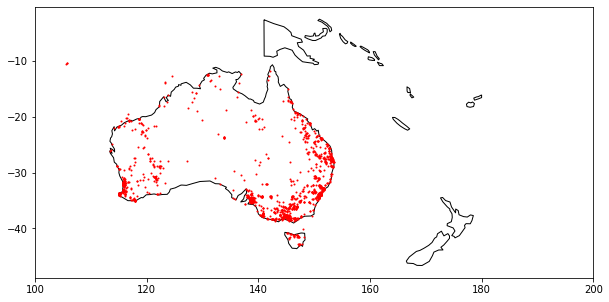

In [82]:
map1()

In [83]:
def map2():

    list_latitude = []
    list_longitude = []
    list_business = []
    emissions_data, rows_of_data = load_file("2000/2001")

    for row in range(0, rows_of_data):
        data_of_row = emissions_data.iloc[row]
        if data_of_row["registered_business_name"] not in list_business:
            list_latitude.append(data_of_row["latitude"])
            list_longitude.append(data_of_row["longitude"])
            list_business.append(data_of_row["registered_business_name"])
            if data_of_row["longitude"] < 105:
                print(data_of_row["report_id"])

    df = pd.DataFrame(
        {'Business': list_business,
         'Latitude': list_latitude,
         'Longitude': list_longitude})

    gdf = geopandas.GeoDataFrame(
        df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

    ax = world[world.continent == 'Oceania'].plot(
        color='white', edgecolor='black')

    gdf.plot(markersize = 1, ax=ax, color='red')
    ax.set_xlim(100, 200)

    plt.show()

loading from file: emissions 2000 to 2001.xlsx


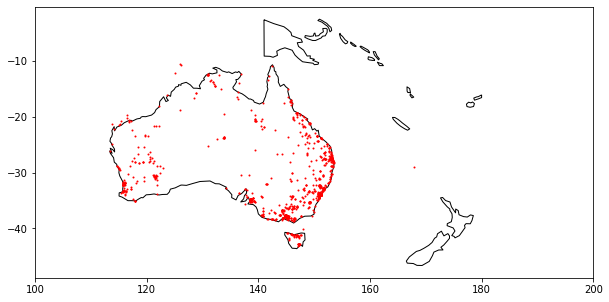

In [84]:
map2()

Growth Of Australian Businesses

loading from file: emissions 2020 to 2021.xlsx
loading from file: emissions 2015 to 2016.xlsx
loading from file: emissions 2010 to 2011.xlsx
loading from file: emissions 2005 to 2006.xlsx


Text(0, 0.5, 'Quantity')

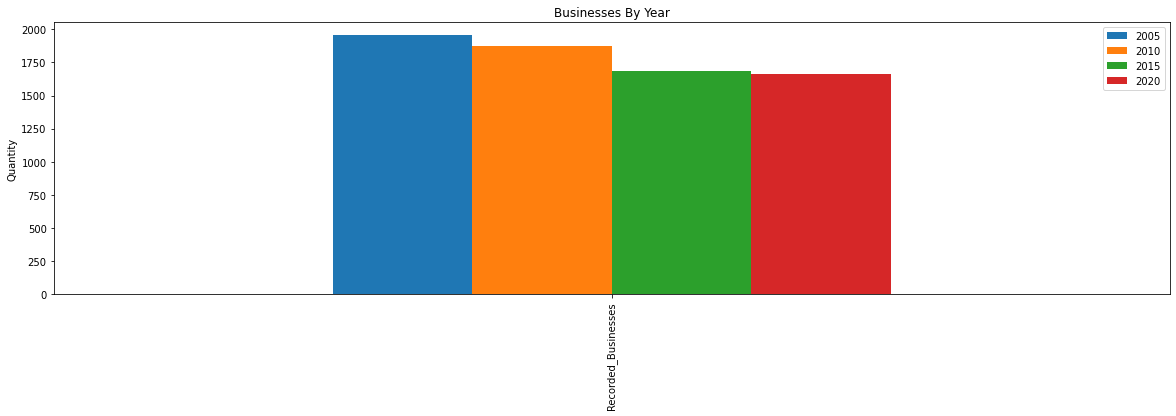

In [85]:

emissions_data, rows_of_data = load_file("2020/2021")
list_business_2020 = len(unique_items_into_list(emissions_data, "registered_business_name"))
emissions_data, rows_of_data = load_file("2015/2016")
list_business_2015 = len(unique_items_into_list(emissions_data, "registered_business_name"))
emissions_data, rows_of_data = load_file("2010/2011")
list_business_2010 = len(unique_items_into_list(emissions_data, "registered_business_name"))
emissions_data, rows_of_data = load_file("2005/2006")
list_business_2005 = len(unique_items_into_list(emissions_data, "registered_business_name"))

pd.options.display.float_format = '{:20,.2f}'.format

df=pd.DataFrame({"2005":list_business_2005, "2010":list_business_2010, "2015":list_business_2015, "2020":list_business_2020,
                }
                , index=["Recorded_Businesses"])

df.plot(kind = "bar", figsize=(20,5))
plt.title("Businesses By Year")
plt.ylabel("Quantity")

Total businesses in AU is 2,402,254, therefore:
More businesses are producing less emissions ie. supermarkets and are not recorded\
    Vice-versa a small group of businesses are producing more emissions
Possibly bussinesses are more focused on digitalisation\
COVID Pandemic (small impact on grand scheme of things)\
Physical existing businesses may be absorbing smaller businesses thus reducing unique businesses registered

Oversights
Data is from National Pollutant Inventory. Greenhouse Gases do not fall under their observations and other government groups take care of that
Links:\
http://www.npi.gov.au/substances/fact-sheets\
https://data.gov.au/dataset/ds-dga-043f58e0-a188-4458-b61c-04e5b540aea4/details?q=

The level of toxicity are different for every substance making comparison difficult

Challenge\
Global Warming Potential for greenhouse gases comparison\
But no system for comparison for pollutant emissions